*Creado por:*

*Isabel Maniega*

## Logging in Python

The Python Standard Library provides a useful module called ```logging``` to log events occurring in the application. Logs are most often used to find the cause of an error. By default, Python and its modules provide many logs informing you of the causes of errors. However, it's good practice to create your own logs that may be useful to you or other programmers.

An example of using your own logs can be any Internet system. When users visit your site, you can log information about the browsers they use. If something goes wrong, you'll be able to determine in which browsers the problem is occurring.

In Python, you can store logs in different places. Most often it's in the form of a file, but it can also be an output stream, or even an external service. To start logging, we need to import the appropriate module:
```
import logging
```
In this part of the course, you'll learn how to create logs using the ```logging``` module. See what this module offers and start using it to become a better programmer.


**The Logger object**

One application may have several loggers created both by us and by programmers of the modules. If your application is simple, as in the example below, you can use the root logger. To do this, call the getLogger function without providing a name. The root logger is at the highest point in the hierarchy. Its place in the hierarchy is assigned based on the names passed to the ```getLogger``` function.

Logger names are similar to the names of the Python modules in which the dot separator is used. Their format is as follows:

- **hello** – creates a logger which is a child of the root logger;

- **hello.world** – creates a logger which is a child of the hello logger.

If you want to make another nesting, just use the dot separator.

The ```getLogger``` function returns a ```Logger``` object. Let's look at the example code in the editor. We'll find there the ways to get the ```Logger``` object, both with and without a name.

We recommend calling the ```getLogger``` function with the ```__name__``` argument, which is replaced by the current module name. This allows you to easily specify the source of the logged message.

NOTE: Several calls to the ```getLogger``` function with the same name will always return the same object.

In [1]:
import logging

logger = logging.getLogger()
hello_logger = logging.getLogger('hello')
hello_world_logger = logging.getLogger('hello.world')
recommended_logger = logging.getLogger(__name__)
print(hello_world_logger)

<Logger hello.world (WARNING)>


**Logging levels**

The ```Logger``` object allows you to create logs with different levels of logging that help you to distinguish between less important logs and those reporting a serious error. By default, the following logging levels are defined:

|    Level name	   | Value |
| ---------------- | ----- |
| ```CRITICAL```   |  50   |
|    ```ERROR```   |  40   |
|   ```WARNING```  |  30   |
|    ```INFO```    |  20   |
|   ```DEBUG```    |  10   |
|   ```NOTSET```   |  0    |

Each level has a ```name``` and a ```numeric``` value. You can also define your own level, but those offered by the ```logging``` module are quite sufficient. The Logger object has methods that set the logging level for you. Take a look at the example in the editor.

Result:
```
CRITICAL:root:Your CRITICAL message
ERROR:root:Your ERROR message
WARNING:root:Your WARNING message
```

All of the above methods require you to provide a message that will be visible in the logs. The default log format includes the level, the logger name and the message you’ve defined. Note that all these values are separated by a colon. Later in this course, you'll learn how to change the default formatting.

You’re probably wondering why messages with INFO and DEBUG levels are not displayed. This is due to the default configuration, which we'll talk about in a moment.

NOTE: The ```basicConfig``` method will be discussed later in the course. For now, remember that it's responsible for the basic logging configuration.

In [2]:
import logging

logging.basicConfig()

logger = logging.getLogger('Hola')

logger.critical('Your CRITICAL message')
logger.error('Your ERROR message')
logger.warning('Your WARNING message')
logger.info('Your INFO message')
logger.debug('Your DEBUG message')

CRITICAL:Hola:Your CRITICAL message
ERROR:Hola:Your ERROR message


**The setLevel method**

The root logger has the logging level set to ```WARNING```. This means that messages at the ```INFO``` or ```DEBUG``` levels aren't processed.

Sometimes you may want to change this behavior, especially if you create your own logger. To do this, you need to pass a logging level to the ```setLevel``` method. See how we do this in the editor.

Result:
```
CRITICAL:root:Your CRITICAL message
ERROR:root:Your ERROR message
WARNING:root:Your WARNING message
INFO:root:Your INFO message
DEBUG:root:Your DEBUG message
```
Setting the ```DEBUG``` level causes messages with this or a higher level to be logged. It's worth mentioning that loggers created using the name argument have the ```NOTSET``` level set by default. In this case, their logging level is set based on the parent levels, starting from the closest parent to the root logger.

If the closest parent has a level set to ```NOTSET```, the logger level is set based on the levels of subsequent parents in the hierarchy. Level setting ends if a parent has a level other than ```NOTSET```. If none of the visited parents has a level other than ```NOTSET```, then all messages will be processed regardless of their level.

In [3]:
import logging

logging.basicConfig()

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

logger.critical('Your CRITICAL message')
logger.error('Your ERROR message')
logger.warning('Your WARNING message')
logger.info('Your INFO message')
logger.debug('Your DEBUG message')

CRITICAL:root:Your CRITICAL message
ERROR:root:Your ERROR message
INFO:root:Your INFO message
DEBUG:root:Your DEBUG message


**Basic configuration (part 1)**

As we mentioned before, the basic logging configuration is done using the ```basicConfig``` method. Calling the ```basicConfig``` method (without specifying any arguments) creates a ```StreamHandler``` object that processes the logs and then displays them in the console.

The ```StreamHandler``` object is created by the default ```Formatter``` object responsible for the log format. As a reminder, the default format consists of the level name, logger name, and defined message. Finally the newly created handler is added to the root logger. Later you'll learn how to create your own handler and formatter.

In the previous examples, we called the ```basicConfig``` method without any arguments. Using the ```basicConfig```, method you can change the logging level (in the same way as using the ```setLevel``` method) and even the location of the logs. Take a look at the example in the editor.

Result in ```prod.log``` file:
```
CRITICAL:root:Your CRITICAL message
```
In the example, the ```basicConfig``` method takes three arguments. The first one is the logging level equal to ```CRITICAL```, which means that only messages with this level will be processed.

Passing a filename to the second argument creates a ```FileHandler``` object (instead of a ```StreamHandler``` object). As you’ve probably noticed, the logs no longer appear in the console. After setting the ```filename``` argument, all logs will be directed to the specified file.

In addition, passing the last ```filemode``` argument with the value ```'a'``` (this is the default mode) means that new logs will be appended to this file. If you'd like to change this mode, you can use other modes that are analogous to those used in the built-in ```open``` function.

These aren't all the arguments that the ```basicConfig``` method can take. Are you ready for another dose of knowledge? Let's move on!

NOTE: The ```basicConfig``` method changes the configuration of the root logger and its children who don't have their own handler defined.



In [4]:
import logging

logging.basicConfig(level=logging.CRITICAL, filename='prod.log', filemode='a')

logger = logging.getLogger()

logger.critical('Your CRITICAL message')
logger.error('Your ERROR message')
logger.warning('Your WARNING message')
logger.info('Your INFO message')
logger.debug('Your DEBUG message')

CRITICAL:root:Your CRITICAL message
ERROR:root:Your ERROR message
INFO:root:Your INFO message
DEBUG:root:Your DEBUG message


**Basic configuration (part 2)**

The ```basicConfig``` method presented earlier can also be used to change the default log formatting. This is done using the ```format``` argument, which can be defined using any characters or attributes of the ```LogRecord``` object. Let's explain it with the example in the editor.

Result in the prod.log file:
```
root:CRITICAL:2019-10-10 17:16:46,293:Your CRITICAL message
```
The format we define is created by combining the attributes of the ```LogRecord``` object separated by a colon. The ```LogRecord``` object is automatically created by the logger during logging. It contains many attributes, such as the name of the ```logger```, the ```logging level```, or even the line number in which the ```logging``` method is called. A full list of all available attributes can be found here [https://docs.python.org/3/library/logging.html#logrecord-attributes].

In our example, we use the following attributes:

**%(name)s** – this pattern will be replaced by the name of the logger that calls the logging method. In our case, it's the root logger;

**%(levelname)s** – this pattern will be replaced with the set login level. In our case, this is the ```CRITICAL``` level;

**%(asctime)s** – this pattern will be replaced with a human-readable date format that indicates when the ```LogRecord``` object was created. The decimal value is expressed in milliseconds;

**%(message)s** – this pattern will be replaced by the defined message. In our case, it's ```'Your CRITICAL message'```.

In general, the scheme for using the ```LogRecord``` object argument in the format argument looks like this:
```
(LOG_RECORD_ATTRIBUTE_NAME)s
```

In [5]:
import logging

FORMAT = '%(name)s:%(levelname)s:%(asctime)s:%(message)s'

logging.basicConfig(level=logging.CRITICAL, filename='prod.log', filemode='a', format=FORMAT)

logger = logging.getLogger()

logger.critical('Your CRITICAL message')
logger.error('Your ERROR message')
logger.warning('Your WARNING message')
logger.info('Your INFO message')
logger.debug('Your DEBUG message')

CRITICAL:root:Your CRITICAL message
ERROR:root:Your ERROR message
INFO:root:Your INFO message
DEBUG:root:Your DEBUG message


**Your first handler**

Each logger can save logs in different locations as well as in different formats. To do this, you must define your own handler and formatter.

In most cases, you'll want to save your logs to a file. The logging module has the ```FileHandler``` class, which facilitates this task. When creating a ```FileHandler``` object, you must pass a filename where the logs will be saved.

Additionally, you can pass a file mode with the mode argument, e.g., ```mode='a'```. In the next step, you should set the logging level that will be processed by the handler. By default, the newly created handler is set to the ```NOTSET``` level. You can change this using the ```setLevel``` method. In the example in the editor, we've set the ```CRITICAL``` level.

Finally, you need to add the created handler to your logger using the ```addHandler``` method.

Result in the ```prod.log``` file:
```
Your CRITICAL message
```
If you check the ```prod.log``` file, you'll see that only the message is saved there. Do you know what we forgot? Your handler hasn't created a formatter. You'll learn how to do this in a moment.

NOTE: Each logger can have several handlers added. One handler can save logs to a file, while another can send them to an external service. In order to process messages with a level lower than ```WARNING``` by added handlers, it's necessary to set this level threshold in the root logger.

In [6]:
import logging

logger = logging.getLogger(__name__)

handler = logging.FileHandler('prod.log', mode='w')
handler.setLevel(logging.CRITICAL)

logger.addHandler(handler)

logger.critical('Your CRITICAL message')
logger.error('Your ERROR message')
logger.warning('Your WARNING message')
logger.info('Your INFO message')
logger.debug('Your DEBUG message')

CRITICAL:__main__:Your CRITICAL message
ERROR:__main__:Your ERROR message
INFO:__main__:Your INFO message
DEBUG:__main__:Your DEBUG message


# Notificaciones vía Whatsapp

Nos registramos en la pagina de:

https://panel.whapi.cloud/register

**Obteniendo el token para la API de WhatsApp**

Registro y conexión de número

Si aún no se ha registrado en la plataforma Whapi.Cloud, el registro es sencillo, no requiere tarjeta de crédito, y obtendrá 5 días de acceso completo a la API con limitaciones menores. Esto será más que suficiente para probar todos los métodos y funciones y configurar su bot o integración.

El siguiente paso es conectar un número de WhatsApp. No necesita pasar por procesos de moderación o migración de números. Conecte cualquier número que ya esté utilizando en su aplicación de WhatsApp. Su chatbot seguirá funcionando incluso si el teléfono está desconectado, por lo que no se preocupe por mantener el dispositivo siempre activo.

Para conectar un número:
1. Vaya al panel y abra la página del canal Default Channel, que ya está creado para usted.
2. En el primer paso, verá un código QR con instrucciones.
3. Abra WhatsApp en su dispositivo, vaya a Configuración → Dispositivos vinculados → Vincular dispositivo → Escanear código QR.
4. Después de conectarse exitosamente, asigne un nombre al canal (por ejemplo, "TestWhapi") para facilitar su uso en el futuro.

Después verá la ventana de configuración, pero por ahora no es necesario: puede omitir este paso y volveremos a él más tarde.

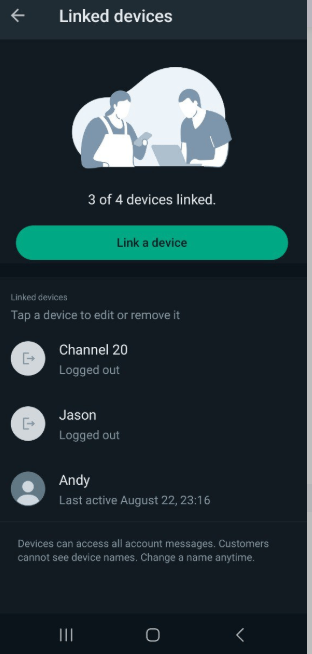

In [7]:
from IPython import display

display.Image("./images/connect_1.png")

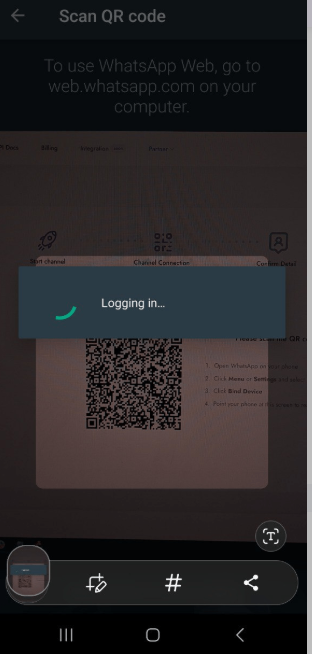

In [8]:
display.Image("./images/connect_2.png")

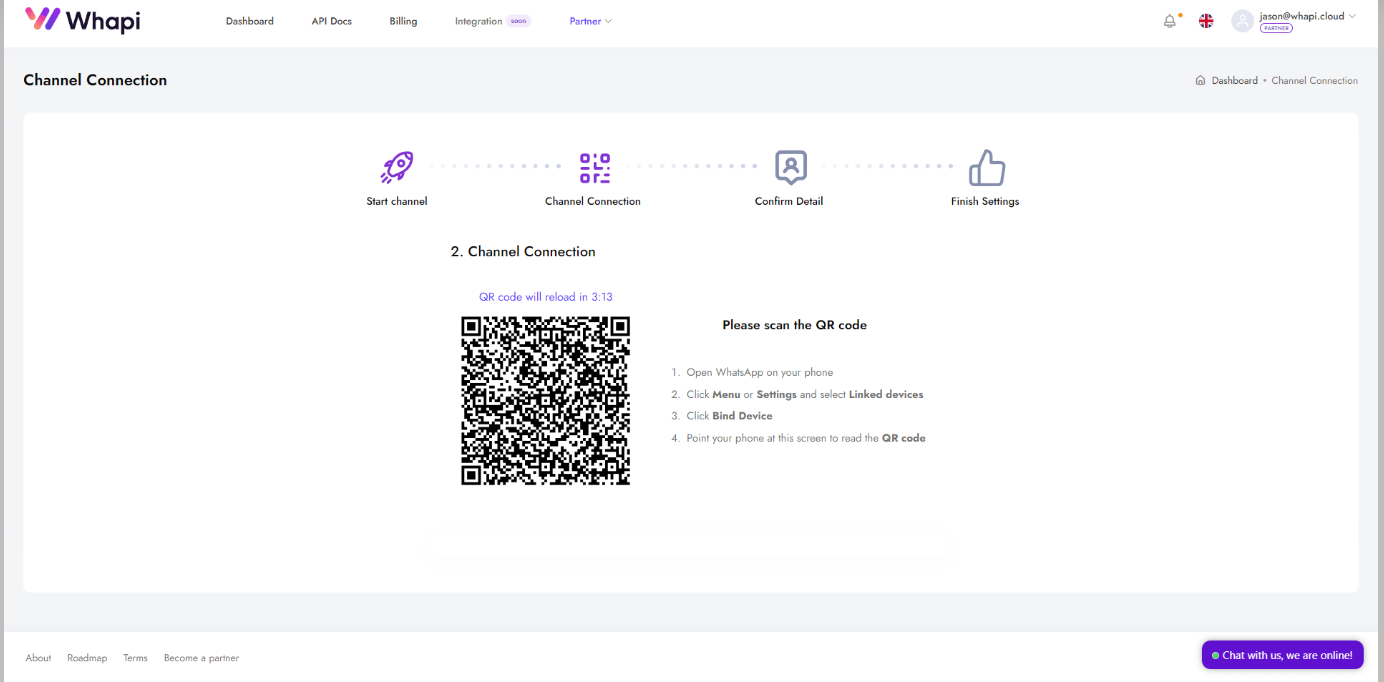

In [9]:
display.Image("./images/connect_3.png")

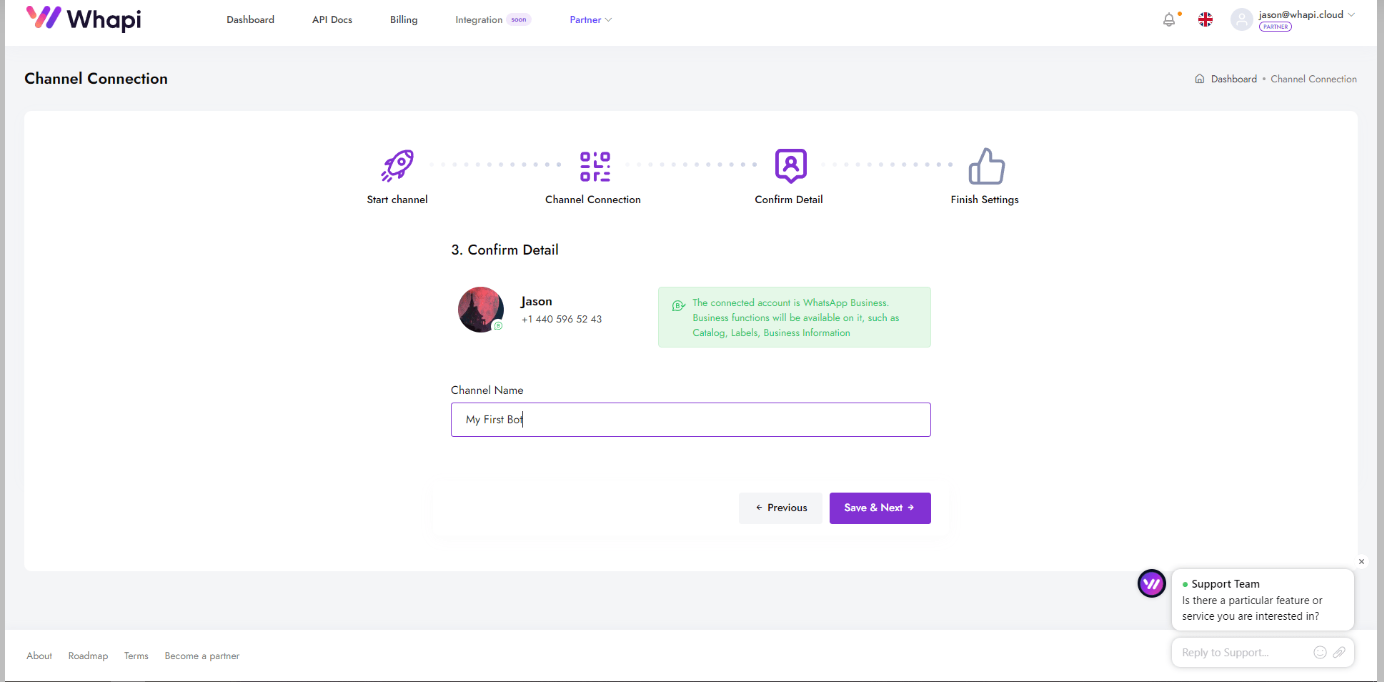

In [10]:
display.Image("./images/connect_4.png")

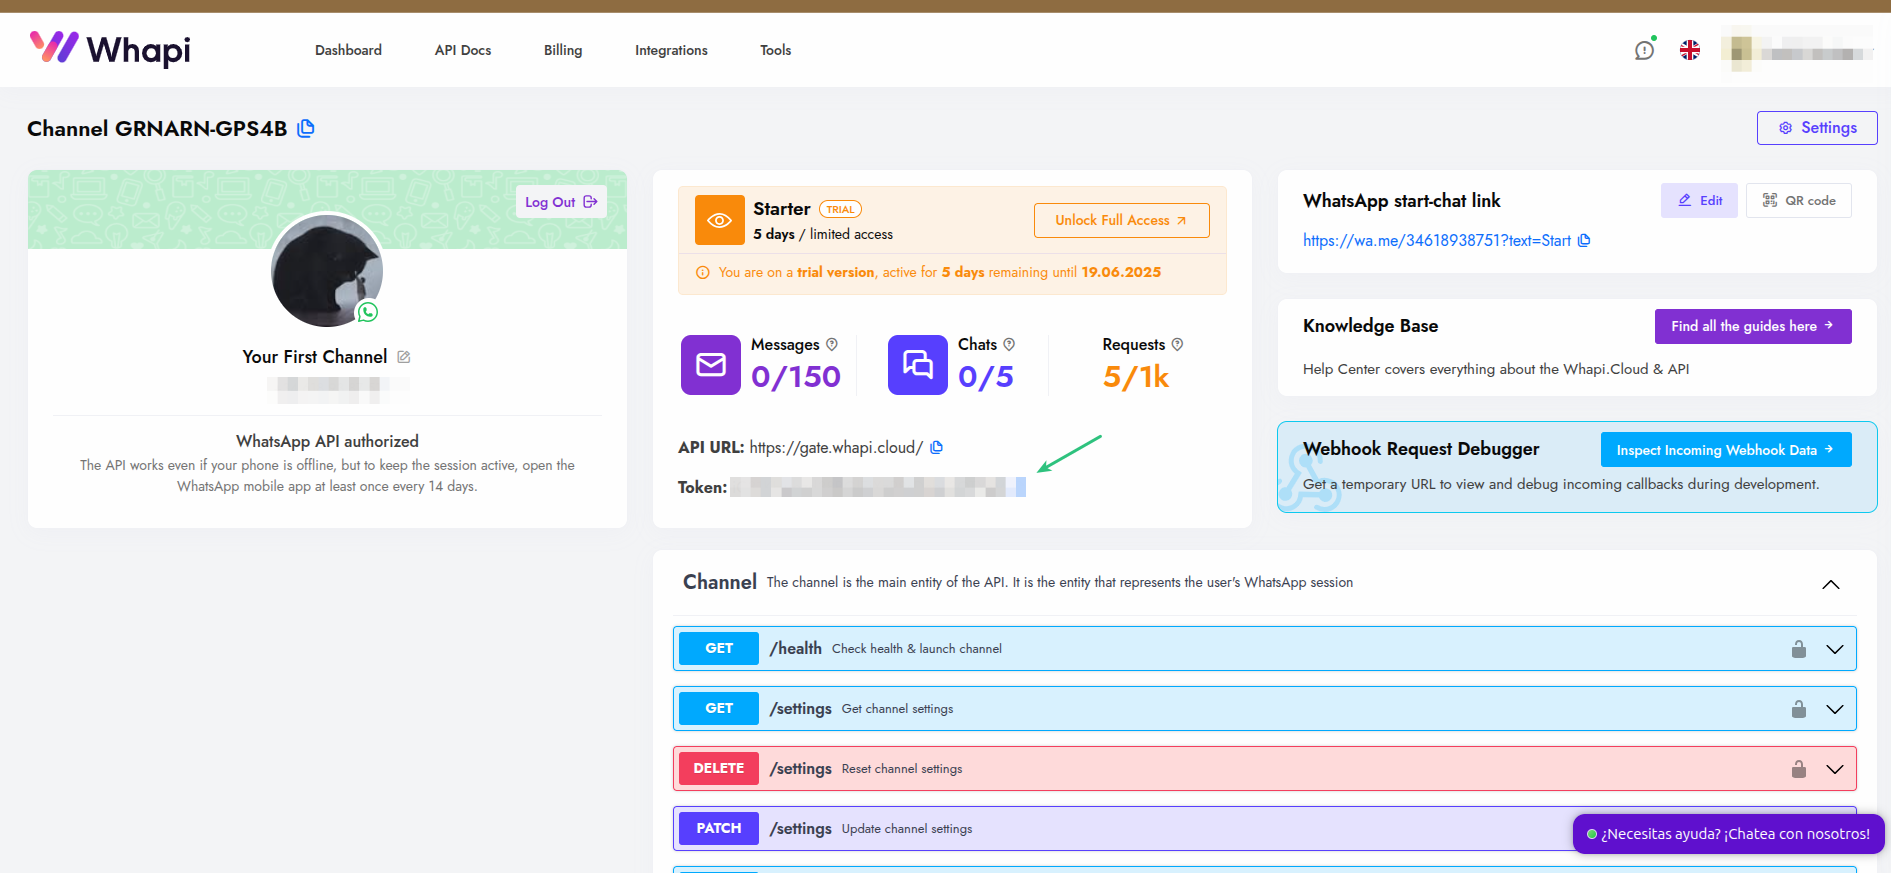

In [11]:
display.Image("./images/connect_5.png")

In [12]:
                                                                  
import requests

# URL for sending text messages. Can be pulled from .env
url = "https://gate.whapi.cloud/messages/text"

# Data for sending a message
payload = {
    "to": "telephone number",  # Enter the recipient's number in international format
    "body": "Hello! This is a test message."  # Text of message
}

api_token = 'Put your Token Here'

# Headers, including authorization token
headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "authorization": f"Bearer {api_token}"  # Use the token from the .env file
}

# Sending a POST request
response = requests.post(url, json=payload, headers=headers)

# Output server response
print(response.status_code)
print(response.text)                   

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): gate.whapi.cloud:443
DEBUG:urllib3.connectionpool:https://gate.whapi.cloud:443 "POST /messages/text HTTP/1.1" 404 None


404
{"error":"Channel not found","requestId":"2c832505-6ed6-4f91-81b9-df8c57afcd54"}


**Otra opción**

## pywhatkit

Esta librería necesita de la conexion Web de Whatsapp que debe estar conectada al pc donde se quieran realizar las pruebas.

In [13]:
# pip install pywhatkit

In [19]:
import pywhatkit

pywhatkit.sendwhatmsg_instantly(
    # Numero de Telefono de destino con el código internacional
    phone_no="&lt;phone-number&gt;", 
    # mensaje que quieres envia
    message="Howdy! This message will be sent instantly!", 
)

Al ejecutar el código se abre la versión web de Whatsapp y esperamos unos segundos y se enviará el mensaje al numero de destino.

In [ ]:
# programar un mensaje de envio:

pywhatkit.sendwhatmsg(
    phone_no="&lt;phone-number&gt;", 
    message="This is a scheduled message.",
    # Hora del envio del mensaje
    time_hour=9, 
    # Minuto del envio del mensaje
    time_min=47
)

# Notificaciones via Email

El módulo smtpd de Python se utiliza para crear y administrar un servidor SMTP (Protocolo de Transferencia de Correo) simple. Este módulo permite configurar un servidor SMTP que puede recibir y procesar correos electrónicos entrantes, lo que lo hace muy útil para probar y depurar las funcionalidades de correo electrónico en las aplicaciones.

Para ello podemos crear un servidor en local, necesitamos crear un entorno virtual  con una versión de Python inferior a la 3.12, ya que en las últimas version el modulo smtp ha sido eliminado:
* virtualenv --python=3.8 venv38

Una vez creado lanzamos el servidor: 
* python -m smtpd -c DebuggingServer -n localhost:1025

Ejecutaremos el servidor en local y abriremos el puerto 1025 para el servicio.

Una vez que se está ejecutando ejecutaremos el siguiente código donde nos pedirá la dirección de correo electrónico donde queremos enviar (From: abc@xyz.com) y desde donde lo enviamos (To: xyz@abc.com), además nos pedirá el cuerpo del mensaje que queremos enviar pondremos Hello World, para probarlo:

In [15]:
import smtplib

def prompt(prompt):
   return input(prompt).strip()
   
fromaddr = prompt("From: ")
toaddrs = prompt("To: ").split()
print("Enter message, end with ^D (Unix) or ^Z (Windows):")

# Add the From: and To: headers at the start!
msg = ("From: %s\r\nTo: %s\r\n\r\n"
   % (fromaddr, ", ".join(toaddrs)))
while True:
   try:
      line = input()
   except EOFError:
      break
   if not line:
      break
   msg = msg + line
   
print("Message length is", len(msg))
server = smtplib.SMTP('localhost', 1025)
server.set_debuglevel(1)
server.sendmail(fromaddr, toaddrs, msg)
server.quit()

From:  xyz@abc.com
To:  abc@xyz.com


Enter message, end with ^D (Unix) or ^Z (Windows):


 Hello World
 


Message length is 49


send: 'ehlo [127.0.1.1]\r\n'
reply: b'250-isabelmaniega\r\n'
reply: b'250-8BITMIME\r\n'
reply: b'250 HELP\r\n'
reply: retcode (250); Msg: b'isabelmaniega\n8BITMIME\nHELP'
send: 'mail FROM:<xyz@abc.com>\r\n'
reply: b'250 OK\r\n'
reply: retcode (250); Msg: b'OK'
send: 'rcpt TO:<abc@xyz.com>\r\n'
reply: b'250 OK\r\n'
reply: retcode (250); Msg: b'OK'
send: 'data\r\n'
reply: b'354 End data with <CR><LF>.<CR><LF>\r\n'
reply: retcode (354); Msg: b'End data with <CR><LF>.<CR><LF>'
data: (354, b'End data with <CR><LF>.<CR><LF>')
send: b'From: xyz@abc.com\r\nTo: abc@xyz.com\r\n\r\nHello World\r\n.\r\n'
reply: b'250 OK\r\n'
reply: retcode (250); Msg: b'OK'
data: (250, b'OK')
send: 'quit\r\n'
reply: b'221 Bye\r\n'
reply: retcode (221); Msg: b'Bye'


(221, b'Bye')

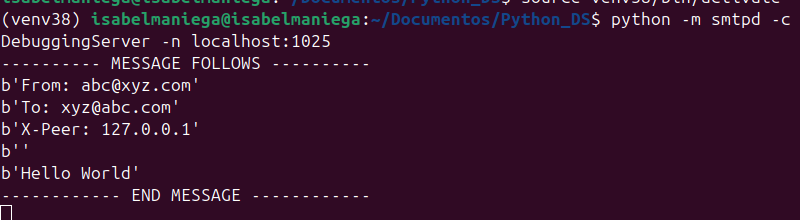

In [18]:
display.Image("./images/server_1.png")

## Envio con formato HTML

Para enviar un correo electrónico HTML usando Python, puede utilizar la biblioteca smtplib para conectarse a un servidor SMTP y los módulos email.mime para construir y formatear el contenido de su correo electrónico adecuadamente.

Al enviar un correo electrónico HTML, debe especificar ciertos encabezados y estructurar el contenido del mensaje en consecuencia para garantizar que el cliente de correo electrónico del destinatario lo reconozca y lo represente como HTML.

In [16]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

# Email content
sender = 'from@fromdomain.com'
receivers = ['to@todomain.com']

# Create message container - the correct MIME type is multipart/alternative.
msg = MIMEMultipart('alternative')
msg['From'] = 'From Person <from@fromdomain.com>'
msg['To'] = 'To Person <to@todomain.com>'
msg['Subject'] = 'SMTP HTML e-mail test'

# HTML message content
html = """\
<html>
  <head></head>
  <body>
    <p>This is an e-mail message to be sent in <b>HTML format</b></p>
    <p><b>This is HTML message.</b></p>
    <h1>This is headline.</h1>
  </body>
</html>
"""

# Attach HTML content to the email
part2 = MIMEText(html, 'html')
msg.attach(part2)

# Connect to SMTP server and send email
try:
   smtpObj = smtplib.SMTP('localhost', 1025)
   smtpObj.sendmail(sender, receivers, msg.as_string())
   print("Successfully sent email")
except smtplib.SMTPException as e:
   print(f"Error: unable to send email. Error message: {str(e)}")

Successfully sent email


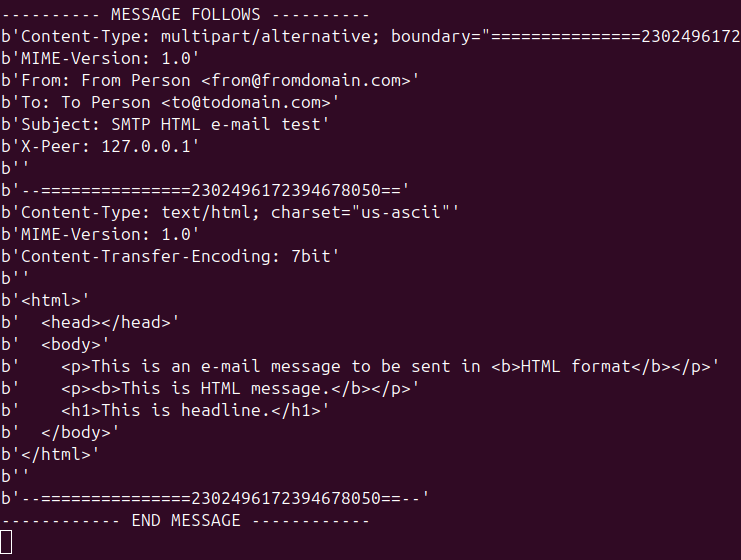

In [17]:
display.Image("./images/server_2.png")

*Creado por:*

*Isabel Maniega*